## Datasets
- Wild Anim Dataset

In [1]:
import cv2
import numpy as np
import os
import glob
from matplotlib import pyplot as plt

In [2]:
pwd

'/Users/tamiyagt/Documents/Machine Learning/01_github/diveintocode-ml/gradproject'

In [41]:
path = './train/chimera_raw/'

images = []
for f in os.listdir(path):
    if '.jpg' in f:
        img = cv2.imread(path+f)
        # convert BGR to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images.append(img)

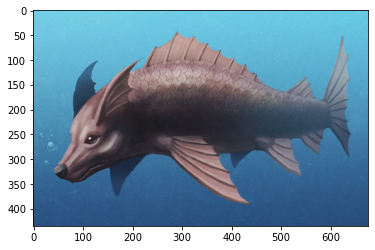

In [42]:
plt.imshow(images[0])

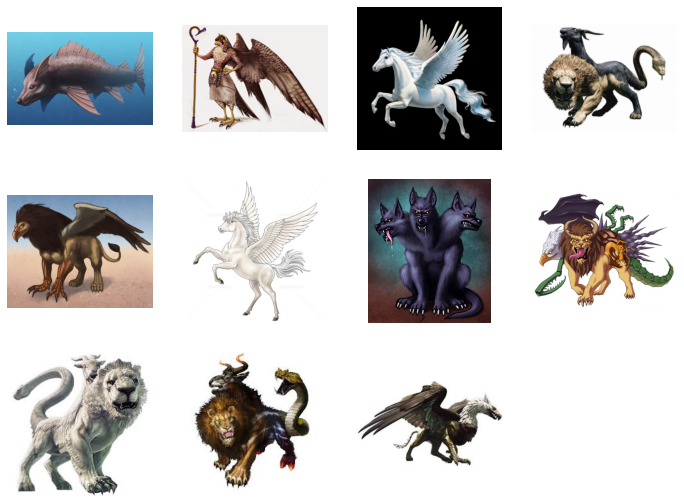

In [51]:
cols = 4
rows = np.ceil(len(images) / cols).astype(np.int) 

fig = plt.figure(figsize=(cols*3,rows*3))
for i, img in enumerate(images):
    plt.subplot(rows, cols, i+1)
    plt.imshow(img)
    plt.axis('off')

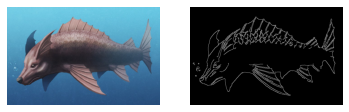

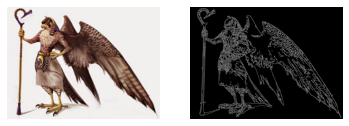

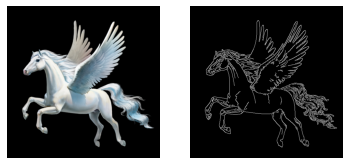

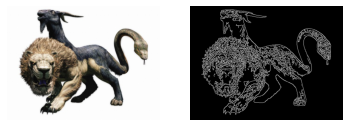

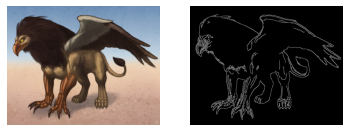

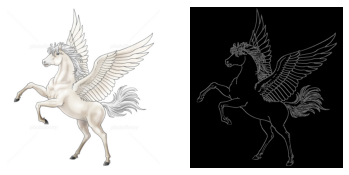

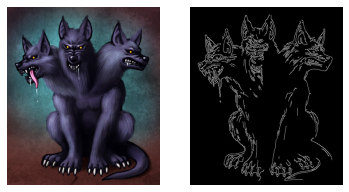

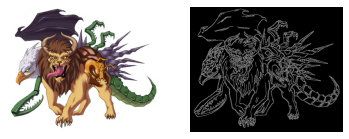

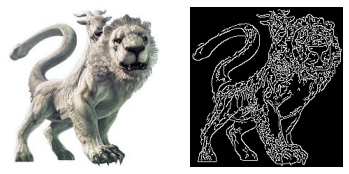

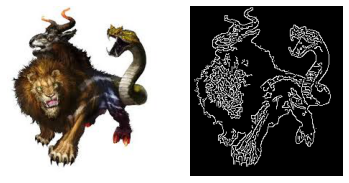

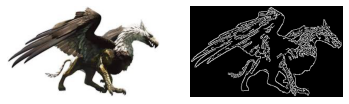

In [65]:
# fig = plt.figure(figsize=(10, 5))
for i, img in enumerate(images):
    edges = cv2.Canny(img,100,200)
    plt.subplot(121),plt.imshow(img,cmap = 'gray')
    plt.axis('off')
    plt.subplot(122),plt.imshow(edges,cmap = 'gray')
    plt.axis('off')
    plt.show()
    
#     plt.title('Original Image'), plt.xticks([]), plt.yticks([])
#     plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

In [66]:
for img in images:
    print(img.shape)

(435, 676, 3)
(655, 889, 3)
(498, 500, 3)
(373, 500, 3)
(496, 637, 3)
(1200, 1134, 3)
(591, 505, 3)
(489, 595, 3)
(230, 219, 3)
(237, 213, 3)
(173, 291, 3)


In [179]:
# Rename animal filenames
os.chdir('/Users/tamiyagt/Documents/Machine Learning/01_github/diveintocode-ml/gradproject/')
animals_path = 'images/animals_all/'

for dirs in os.listdir(animals_path):
    ind = 1
    if '.' not in dirs:
        dirs_path = os.path.join(animals_path, dirs)
        for file in os.listdir(dirs_path):
            if '.jpg' in file:
#                 dst = os.path.join(dirs_path, '{}_{}.jpg'.format(dirs.lower(), ind))
                while os.path.exists(os.path.join(dirs_path, '{}_{}.jpg'.format(dirs.lower(), ind))):
                    ind += 1
                os.rename(os.path.join(dirs_path, file), os.path.join(dirs_path, '{}_{}.jpg'.format(dirs.lower(), ind)))

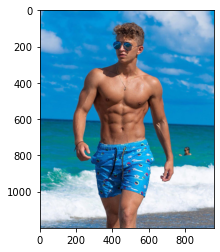

In [15]:
animals_path = 'images/animals_all/'
samp = 'Human/human_7.jpg'


img = cv2.imread(animals_path + samp)
# convert BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)


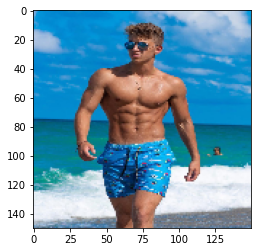

In [16]:
dim = (150, 150)
img_rs = cv2.resize(img, dim)
plt.imshow(img_rs)

In [98]:
# Make dict with animal images categorized by class
dim = (150, 150)
animals = {}
for root, dirs, file in os.walk(animals_path):
    name = root.split('/')[-1]
    imgs = []
    for f in file:
        if '.jpg' in f:
            img = cv2.imread(os.path.join(root, f))
            # convert BGR to RGB
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            # resize to 150,150
            img = cv2.resize(img, dim)
            imgs.append(img)
    if name != '':
        animals[name] = np.array(imgs)

In [99]:
animals.keys()

dict_keys(['Bear', 'Leopard', 'Goat', 'Wolf', 'Bird', 'Horse', 'Human', 'Lion', 'Snake', 'Elephant'])

In [128]:
# train data with Goats, Lions, Snakes, Horses, Birds
X = np.concatenate((animals['Goat'], animals['Lion'], animals['Snake'], animals['Horse'], animals['Bird']))

In [172]:
len(animals['Goat'])

380

In [132]:
# Make label array for edges 
y = []
for img in train:
    edges = cv2.Canny(img,200,300)
    edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)
    y.append(edges)
y = np.array(y)

In [133]:
y.shape

(2135, 150, 150, 3)

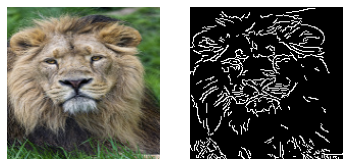

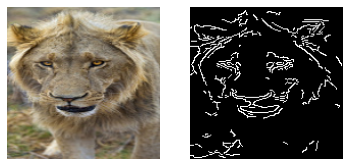

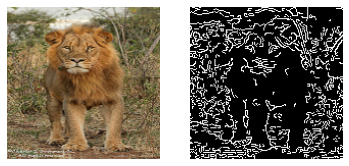

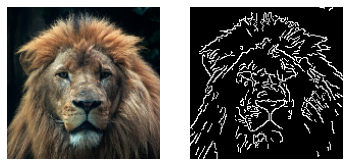

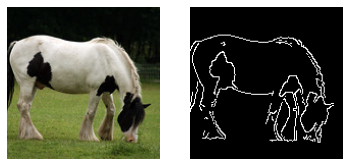

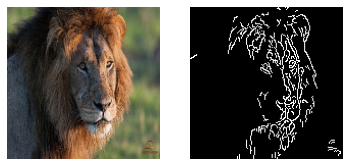

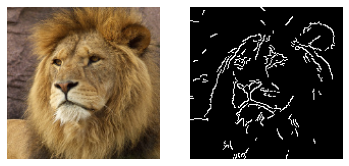

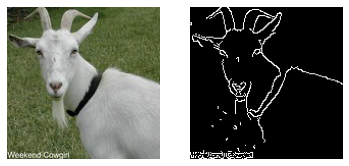

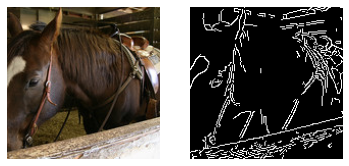

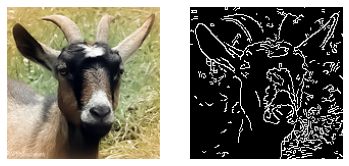

In [131]:
from numpy import random
random.seed(42)

# fig = plt.figure(figsize=(10, 5))
for i in range(10):
    idx = random.randint(len(X))
    img = X[idx]
    
    edges = cv2.Canny(img,200,300)
    plt.subplot(121),plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.subplot(122),plt.imshow(edges, cmap='gray')
    plt.axis('off')
    plt.show()
    
#     plt.title('Original Image'), plt.xticks([]), plt.yticks([])
#     plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

In [140]:
# Make pix2pix format dataset
train_set = np.concatenate((X, y), axis=2)

for i, img in enumerate(train_set):
    cv2.imwrite('images/train/train_{}.jpg'.format(i), img)

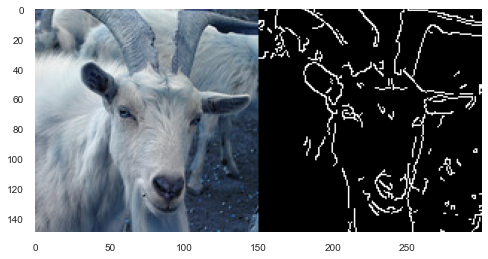

In [173]:
plt.imshow(train_set[0])

In [166]:
# Prepare testing data
test_path = './images/chimera_raw/'

X_test = []
y_test = []

for f in os.listdir(test_path):
    if '.jpg' in f:
        img = cv2.imread(test_path+f)
        # convert BGR to RGB
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, dim)
        X_test.append(img)
        
        # make edges image
        edges = cv2.Canny(img,100,200)
        edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)
        y_test.append(edges)
        
X_test = np.array(X_test)
y_test = np.array(y_test)

# Make pix2pix format dataset
test_set = np.concatenate((X_test, y_test), axis=2)

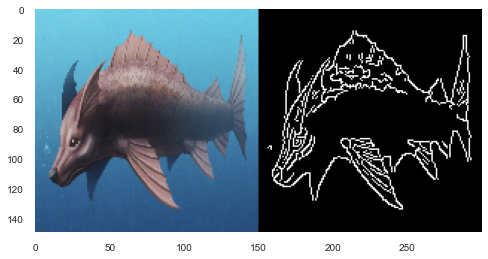

In [170]:
plt.imshow(cv2.cvtColor(test_set[0], cv2.COLOR_BGR2RGB))

In [168]:
for i, img in enumerate(test_set):
    cv2.imwrite('images/test/test_{}.jpg'.format(i), img)

matplotlibで描画するため、画像がRGBのままになっていることに気づく。JPGのBGRに変換してから再度学習を実施

In [154]:
# Make dict with animal images categorized by class
animals_path = 'images/animals_all/'

dim = (150, 150)
animals = {}
for root, dirs, file in os.walk(animals_path):
    name = root.split('/')[-1]
    imgs = []
    for f in file:
        if '.jpg' in f:
            img = cv2.imread(os.path.join(root, f))
            # convert BGR to RGB
#             img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            # resize to 150,150
            img = cv2.resize(img, dim)
            imgs.append(img)
    if name != '':
        animals[name] = np.array(imgs)

# train data with Goats, Lions, Snakes, Horses, Birds
X = np.concatenate((animals['Goat'], animals['Lion'], animals['Snake'], animals['Horse'], animals['Bird']))

# Make label array for edges 
y = []
for img in train:
    edges = cv2.Canny(img,200,300)
    edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
    y.append(edges)
y = np.array(y)

# Make pix2pix format dataset
train_set = np.concatenate((X, y), axis=2)

for i, img in enumerate(train_set):
    cv2.imwrite('images/train/train_{}.jpg'.format(i), img)

In [159]:
input_path = 'images/outputs_200722/'
imgs_bgr = []
imgs_rgb = []
for f in os.listdir(input_path):
    if 'targets' in f:
        img = cv2.imread(os.path.join(input_path, f))
        imgs_rgb.append(img)
        # convert BGR to RGB
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        imgs_bgr.append(img)

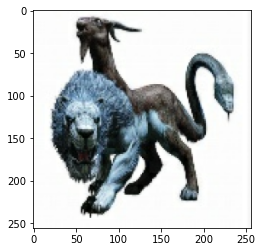

In [161]:
plt.imshow(imgs_bgr[0])

In [163]:
for i, img in enumerate(imgs_bgr):
    cv2.imwrite(input_path+'bgr_{}.png'.format(i), img)

## Prepare images for pytorch pix2pix

In [174]:
# Make dict with animal images categorized by class
os.chdir('/Users/tamiyagt/Documents/Machine Learning/01_github/diveintocode-ml/gradproject/')
animals_path = 'images/animals_all/'

dim = (150, 150)
animals = {}
for root, dirs, file in os.walk(animals_path):
    name = root.split('/')[-1]
    imgs = []
    for f in file:
        if '.jpg' in f:
            img = cv2.imread(os.path.join(root, f))
            # convert BGR to RGB
#             img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            # resize to 150,150
            img = cv2.resize(img, dim)
            imgs.append(img)
    if name != '':
        animals[name] = np.array(imgs)
        
# train data with Goats, Lions, Snakes, Horses, Birds
X = np.concatenate((animals['Goat'], animals['Lion'], animals['Snake'], animals['Horse'], animals['Bird']))

In [175]:
len(X)

969

In [178]:
# Make label array for edges 
y = []
for img in X:
    edges = cv2.Canny(img,200,300)
    edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)
    y.append(edges)
y = np.array(y)

In [179]:
len(y)

969

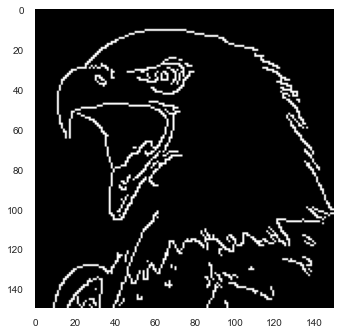

In [181]:
plt.imshow(y[-1])

In [183]:
path_A = './pytorch-CycleGAN-and-pix2pix/datasets/chimera/A/train/'
path_B = './pytorch-CycleGAN-and-pix2pix/datasets/chimera/B/train/'

for i, (img, edge) in enumerate(zip(X, y)):
    cv2.imwrite(path_A+'{}.jpg'.format(i), img)
    cv2.imwrite(path_B+'{}.jpg'.format(i), edge)

In [186]:
# Prepare testing data
test_path = './images/chimera_raw/'

X_test = []
y_test = []

for f in os.listdir(test_path):
    if '.jpg' in f:
        img = cv2.imread(test_path+f)
        # convert BGR to RGB
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, dim)
        X_test.append(img)
        
        # make edges image
        edges = cv2.Canny(img,100,300)
        edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)
        y_test.append(edges)
        
test_A = './pytorch-CycleGAN-and-pix2pix/datasets/chimera/A/test/'
test_B = './pytorch-CycleGAN-and-pix2pix/datasets/chimera/B/test/'
        
for i, (img, edge) in enumerate(zip(X_test, y_test)):
    cv2.imwrite(test_A+'{}.jpg'.format(i), img)
    cv2.imwrite(test_B+'{}.jpg'.format(i), edge)

In [1]:
pwd

'/Users/tamiyagt/Documents/Machine Learning/01_github/diveintocode-ml/gradproject'

In [27]:
import os
PATH = './pytorch_pix2pix/checkpoints/chimera/web/images/'

files = sorted(os.listdir(PATH))

In [28]:
test = []
for f in files:
    num = int(f[5:8])
    num = str(200+num)
    new = f[:5] + num + f[8:]
    os.rename(PATH+f, PATH+new)

In [19]:
num = int(files[0][5:8])
num = str(200+num)
print(num)

201


In [20]:
files[0][:5]+num+files[0][8:]

'epoch201_fake_B.png'

In [29]:
pwd

'/Users/tamiyagt/Documents/Machine Learning/01_github/diveintocode-ml/gradproject'

In [55]:
# Prepare testing data
dim = (256, 256)
source_path = '/Users/tamiyagt/Desktop/animal_images/chimera/'
test_path = './images/chimera_raw/'

X_test = []
y_test = []

for f in os.listdir(source_path):
    if '.jpg' in f:
        img = cv2.imread(source_path+f)
        # convert BGR to RGB
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, dim)
        X_test.append(img)
        
        # make edges image
        if 'chimera.jp' in f:
            edges = cv2.Canny(img,300,100)
        else:
            edges = cv2.Canny(img,300,300)
            
        edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)
        y_test.append(edges)
        
test_A = './pytorch_pix2pix/datasets/chimera/A/test/'
test_B = './pytorch_pix2pix/datasets/chimera/B/test/'
        
for i, (img, edge) in enumerate(zip(X_test, y_test)):
    cv2.imwrite(test_path+'{}.jpg'.format(i+11), img)
    cv2.imwrite(test_A+'{}.jpg'.format(i+11), img)
    cv2.imwrite(test_B+'{}.jpg'.format(i+11), edge)

In [36]:
len(y_test)

5

In [56]:
img = cv2.imread(test_A+'13.jpg')
edges = cv2.Canny(img, 300, 100)
edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)

cv2.imwrite(test_B+'13.jpg', edges)

True

In [91]:
X_test = []
y_test = []

for f in sorted(os.listdir(test_A)):
    if '.jpg' in f:
        img = cv2.imread(test_A+f)
        X_test.append(img)
        
for f in sorted(os.listdir(test_B)):
    if '.jpg' in f:
        img = cv2.imread(test_B+f)
        y_test.append(img)

In [83]:
for x in y_test:
    print(x.shape)

(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)


In [76]:
X_test[3:8].shape

(5,)

In [92]:
X_new = np.array(X_test[3:8])
y_new = np.array(y_test[3:8])

In [95]:
test_set = np.concatenate((X_new, y_new), axis=2)

In [96]:
test_set.shape

(5, 256, 512, 3)

In [97]:
for i, f in enumerate(test_set):
    cv2.imwrite('./pytorch_pix2pix/datasets/chimera_256/test/{}.jpg'.format(i), f)

In [105]:
# Prepare additional testing data
dim = (150, 150)
source_path = '/Users/tamiyagt/Desktop/animal_images/test_animals/'

X_test = []
y_test = []

for f in os.listdir(source_path):
    if '.jpg' in f:
        img = cv2.imread(source_path+f)
        # convert BGR to RGB
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, dim)
        X_test.append(img)
        
        # make edges image
        if 'chimera.jp' in f:
            edges = cv2.Canny(img,300,100)
        else:
            edges = cv2.Canny(img,300,300)
            
        edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)
        y_test.append(edges)
        
X_test = np.array(X_test)
y_test = np.array(y_test)

In [106]:
test_set = np.concatenate((X_test, y_test), axis=2)

In [107]:
for i, f in enumerate(test_set):
    cv2.imwrite('./pytorch_pix2pix/datasets/chimera/test/{}.jpg'.format(16+i), f)

## AutoCanny

In [2]:
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)
    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)
    # return the edged image
    return edged

In [17]:
samp[0]

'66.dog-transparent-clip-art-image-5a1d601a5dcd77.8763576015118745863842.jpg'

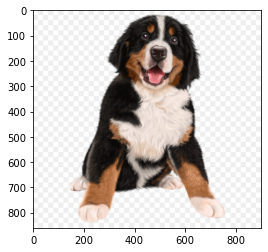

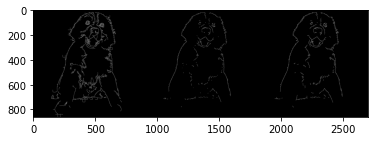

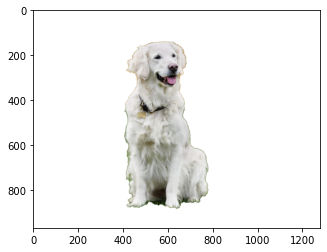

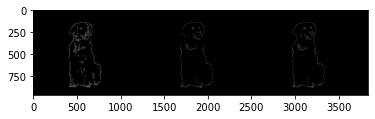

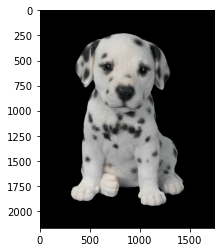

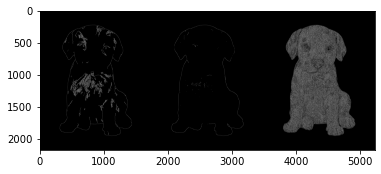

In [19]:
# loop over the images
path = '/Users/tamiyagt/gid_patch/google_images_download/downloads/dog transparent/'
samp = os.listdir(path)

for f in samp[:3]:
    if '.jpg' in f or '.png' in f:
        # load the image, convert it to grayscale, and blur it slightly
        image = cv2.imread(path+f)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        blurred = cv2.GaussianBlur(gray, (3, 3), 0)
        # apply Canny edge detection using a wide threshold, tight
        # threshold, and automatically determined threshold
        wide = cv2.Canny(blurred, 10, 200)
        tight = cv2.Canny(blurred, 225, 250)
        auto = auto_canny(blurred)
        # show the images
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.show()
        plt.imshow(cv2.cvtColor(np.hstack([wide, tight, auto]), cv2.COLOR_BGR2RGB))
        plt.show()

## Resize images

In [7]:
def resize_to_square(im, size):
    
    desired_size = size        
    old_size = im.shape[:2] # old_size is in (height, width) format

    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])

    # new_size should be in (width, height) format

    im = cv2.resize(im, (new_size[1], new_size[0]))

    delta_w = desired_size - new_size[1]
    delta_h = desired_size - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)

    color = [255, 255, 255]
    new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_REPLICATE, value=color)

    return new_im

In [149]:
src = './images/animals_all/Test/'
dest_128 = './images/animals_all/Test_128/'
dest_256 = './images/animals_all/Test_256/'
files = os.listdir(src)

for file in files:
    if '.jpg' in file or '.jpeg' in file or '.png' in file:
        im = cv2.imread(src+file, 1)
        new_im = resize_to_square(im, 128)
        cv2.imwrite(dest_128+file, new_im)
            
for file in files:
    if '.jpg' in file or '.jpeg' in file or '.png' in file:
        im = cv2.imread(src+file, 1)
        new_im = resize_to_square(im, 256)
        cv2.imwrite(dest_256+file, new_im)

## Combine image & edges

In [14]:
# prepare AB images
def combine_A_B(src, dest, size):
    ls = [0]
    for f in os.listdir(dest):
        for w in f.split('.'):
            try:
                ls.append(int(w))
            except:
                pass
    
    count = max(ls)+1
    
    X = []; y = []

    for f in os.listdir(src):
        if '.jpg' in f:
            img = cv2.imread(src+f)
            img = resize_to_square(img, size)
            X.append(img)
            # make edges image
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            blurred = cv2.GaussianBlur(gray, (3, 3), 0)
            edges = auto_canny(blurred) #auto
#             edges = cv2.Canny(blurred, 10, 200) #wide
#             edges = cv2.Canny(blurred, 225, 250) #tight
#             edges = cv2.Canny(blurred, 100, 250) #custom
            edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
            
            y.append(edges)

    X = np.array(X)
    y = np.array(y)

    dataset = np.concatenate((X, y), axis=2)

    for i, f in enumerate(dataset):
        cv2.imwrite(dest+'{}.jpg'.format(count+i), f)

In [111]:
src = '/Users/tamiyagt/Desktop/animal_images/test_animals/'
dest = './pytorch_pix2pix/datasets/chimera/test/'

make_test_set(src, dest)

In [151]:
src = './images/animals_all/Test_256/'
dest = './pytorch_pix2pix/datasets/chimera_256/test/'
thresh = (300, 300)

combine_A_B(src, dest, thresh)

In [63]:
path = './images/Test/Original/'

for root, dirs, file in os.walk(path):
    for f in file:
        if '.png' in f or '.jpeg' in f:
            os.rename(root+'/'+f, root+'/'+f+'.jpg')

In [61]:
# Create transparent dataset
src = './images/animals_transparent/'
dest = './pytorch_pix2pix/datasets/chimera_256T/train/'
size = 256

for dirs in os.listdir(src):
    if 'transparent' in dirs:
        combine_A_B(src+dirs+'/', dest, size)

In [64]:
# Create test set
src = './images/Test/Original/'
dest = './pytorch_pix2pix/datasets/chimera_256T/test/'
size = 256

combine_A_B(src, dest, size)

In [6]:
# Create 256x256 dataset
src = './images/animals_raw/'
dest = './pytorch_pix2pix/datasets/chimera_256/train/'
size = 256

for dirs in os.listdir(src):
    if '.' not in dirs:
        combine_A_B(src+dirs+'/', dest, size)

In [9]:
vanilla_path = './pytorch_pix2pix/datasets/chimera_256/train/'
transparent_path = './pytorch_pix2pix/datasets/chimera_256T/train/'
dest = './pytorch_pix2pix/datasets/chimera_256A/train/'

i = 1
for f in os.listdir(transparent_path):
    if '.jpg' in f:
        os.rename(transparent_path+f, transparent_path+'{}.jpg'.format(i))
        i += 1

In [2]:
pwd

'/Users/tamiyagt/Documents/Machine Learning/01_github/diveintocode-ml/gradproject'

In [15]:
src = '/Users/tamiyagt/Desktop/new/'
dest = '/Users/tamiyagt/Desktop/new_test/'
size = 256

combine_A_B(src, dest, size)